# Preprocessing

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('marketing_campaign.csv', sep = ';')

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Data Cleansing

### Missing Value

In [ ]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df['Income'].fillna(df['Income'].median(), inplace = True)

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Outlier

Penanganan Outlier Kolom `Income`

In [ ]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)

filtered_entries = ((df['Income'] >= low_limit) & (df['Income'] <= high_limit))
df = df[filtered_entries]

Penanganan Outlier Kolom `Year_Birth`

In [ ]:
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)

filtered_entries = ((df['Year_Birth'] >= low_limit) & (df['Year_Birth'] <= high_limit))
df = df[filtered_entries]

Penanganan Outlier Kolom Num of Purchases dan Num of web visit

In [ ]:
from scipy import stats

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
zscore_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
filtered_entries = np.array([True] * len(df))

for col in zscore_columns:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 2229
Jumlah baris setelah memfilter outlier: 2189


### Feature Transformation

In [ ]:
# Tranformasi kolom
df['log_MntWines'] = np.log1p(df['MntWines'])
df['log_MntFruits'] = np.log1p(df['MntFruits'])
df['log_MntMeatProducts'] = np.log1p(df['MntMeatProducts'])
df['log_MntFishProducts'] = np.log1p(df['MntFishProducts'])
df['log_MntSweetProducts'] = np.log1p(df['MntSweetProducts'])
df['log_MntGoldProds'] = np.log1p(df['MntGoldProds'])

### Feature Encoding

In [ ]:
#Label Encoding Kolom Education
mapping_education = {
    'Basic' : 0,
    'Graduation' : 1,
    '2n Cycle' : 2,
    'Master' : 2,
    'PhD' : 3
}

df['Education'] = df['Education'].map(mapping_education)

In [ ]:
# Mengganti value feature Marital_Status menjadi 'In Couple' dan 'Alone'
df['Marital_Status'].replace(['Married','Together'], 'In Couple', inplace=True)
df['Marital_Status'].replace(['Single','Divorced','Widow','Alone','Absurd','YOLO'], 'Alone', inplace=True)

In [ ]:
# One hot encoding kolom Marital_Status
for cat in ['Marital_Status']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [ ]:
#Menghapus kolom yang outdated
df = df.drop(columns=['Marital_Status'])
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Z_Revenue,Response,log_MntWines,log_MntFruits,log_MntMeatProducts,log_MntFishProducts,log_MntSweetProducts,log_MntGoldProds,Marital_Status_Alone,Marital_Status_In Couple
0,5524,1957,1,58138.0,0,0,2012-09-04,58,635,88,...,11,1,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,1,0
1,2174,1954,1,46344.0,1,1,2014-03-08,38,11,1,...,11,0,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,1,0
2,4141,1965,1,71613.0,0,0,2013-08-21,26,426,49,...,11,0,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,0,1
3,6182,1984,1,26646.0,1,0,2014-02-10,26,11,4,...,11,0,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,0,1
4,5324,1981,3,58293.0,1,0,2014-01-19,94,173,43,...,11,0,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,0,1


## Feature Engineering

### Feature Selection

In [ ]:
df = df.drop(columns=['ID','Z_CostContact','Z_Revenue','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Dt_Customer','Year_Birth'])


df = df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])
df.head()

,Education,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,log_MntWines,log_MntFruits,log_MntMeatProducts,log_MntFishProducts,log_MntSweetProducts,log_MntGoldProds,Marital_Status_Alone,Marital_Status_In Couple
0,1,58138.0,0,0,58,3,8,10,4,7,0,1,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,1,0
1,1,46344.0,1,1,38,2,1,1,2,5,0,0,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,1,0
2,1,71613.0,0,0,26,1,8,2,10,4,0,0,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,0,1
3,1,26646.0,1,0,26,2,2,0,4,6,0,0,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,0,1
4,3,58293.0,1,0,94,5,5,3,6,5,0,0,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,0,1


In [ ]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'log_MntWines', 'log_MntFruits', 'log_MntMeatProducts',
       'log_MntFishProducts', 'log_MntSweetProducts', 'log_MntGoldProds',
       'Marital_Status_Alone', 'Marital_Status_In Couple'],
      dtype='object')

### Feature Extraction

In [ ]:
df_purchases = pd.read_csv('marketing_campaign.csv', sep = ';')
#Menambahkan kolom total jumlah belanja  (total amount spent)
df['total_spent'] = df_purchases['MntWines'] + df_purchases['MntFruits'] + df_purchases['MntMeatProducts'] + df_purchases['MntFishProducts'] + df_purchases['MntSweetProducts'] + df_purchases['MntGoldProds']

#Menambahkan kolom total berapa kali pembelian (number of purchases)
df_purchases = pd.read_csv('marketing_campaign.csv', sep = ';')
df['total_purchases'] = df_purchases['NumDealsPurchases']+ df_purchases['NumWebPurchases'] + df_purchases['NumCatalogPurchases'] + df_purchases['NumStorePurchases']

#Menampilkan dataframe
df.head()

,Education,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,log_MntWines,log_MntFruits,log_MntMeatProducts,log_MntFishProducts,log_MntSweetProducts,log_MntGoldProds,Marital_Status_Alone,Marital_Status_In Couple,total_spent,total_purchases
0,1,58138.0,0,0,58,3,8,10,4,7,...,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,1,0,1617,25
1,1,46344.0,1,1,38,2,1,1,2,5,...,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,1,0,27,6
2,1,71613.0,0,0,26,1,8,2,10,4,...,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,0,1,776,21
3,1,26646.0,1,0,26,2,2,0,4,6,...,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,0,1,53,8
4,3,58293.0,1,0,94,5,5,3,6,5,...,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,0,1,422,19


In [ ]:
df['Response'].value_counts()

0    1864
1     325
Name: Response, dtype: int64

In [ ]:
X = df.drop(columns=['Response'].copy())
y = df[['Response']].copy()

## Class Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
X = df.drop(columns=['Response'])
y = df['Response']
sm = SMOTE(sampling_strategy=0.66, random_state=42)
X_smote, y_smote = sm.fit_resample(X, y)

In [ ]:
y_smote.value_counts()

0    1864
1    1230
Name: Response, dtype: int64

In [ ]:
df = df.drop(columns=['Education'])

In [ ]:
df = df.drop(columns=['Complain'])
df.head()

,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,log_MntWines,log_MntFruits,log_MntMeatProducts,log_MntFishProducts,log_MntSweetProducts,log_MntGoldProds,Marital_Status_Alone,Marital_Status_In Couple,total_spent,total_purchases
0,58138.0,0,0,58,3,8,10,4,7,1,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,1,0,1617,25
1,46344.0,1,1,38,2,1,1,2,5,0,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,1,0,27,6
2,71613.0,0,0,26,1,8,2,10,4,0,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,0,1,776,21
3,26646.0,1,0,26,2,2,0,4,6,0,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,0,1,53,8
4,58293.0,1,0,94,5,5,3,6,5,0,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,0,1,422,19


In [ ]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Response', 'log_MntWines', 'log_MntFruits',
       'log_MntMeatProducts', 'log_MntFishProducts', 'log_MntSweetProducts',
       'log_MntGoldProds', 'Marital_Status_Alone', 'Marital_Status_In Couple',
       'total_spent', 'total_purchases'],
      dtype='object')

# Modeling

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

#membuat function untuk memanggil evaluasi model
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

## Split Data Train & Test

In [ ]:
#Memisahkan data menjadi train dan test dengan perbandingan 70:30

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.25, random_state = 42)

## Modeling Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

**Prediction Result (in Data Test)**

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,

**Evaluation**

In [ ]:
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.76
Recall (Test Set): 0.66
F1-Score (Test Set): 0.70
AUC: 0.75


In [ ]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.7646551724137931
Test score:0.7687338501291989


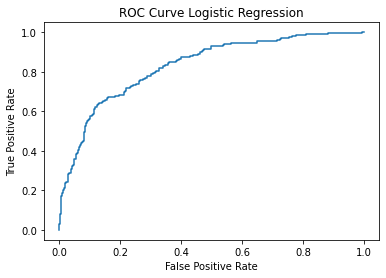

In [ ]:
from sklearn import metrics
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002]
solver = ['liblinear', 'sag', 'saga']
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.77
Recall (Test Set): 0.59
F1-Score (Test Set): 0.67
AUC: 0.73


In [ ]:
print('Best algorithm:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])
print('Best solver:', model.best_estimator_.get_params()['solver'])

Best algorithm: l2
Best C: 0.001
Best solver: liblinear


In [ ]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.7613168724279835
Test score:0.7732793522267206


## Modeling K-nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
eval_classification(model2, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.77
Recall (Test Set): 0.59
F1-Score (Test Set): 0.67
AUC: 0.73


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model2 = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fit Model & Evaluasi
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
eval_classification(model2, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.70
Recall (Test Set): 0.81
F1-Score (Test Set): 0.75
AUC: 0.78


In [ ]:
print('Best n_neighbors:', model2.best_estimator_.get_params()['n_neighbors'])
print('Best p:', model2.best_estimator_.get_params()['p'])
print('Best algorithm:', model2.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 5
Best p: 1
Best algorithm: ball_tree


In [ ]:
print('Train score: ' + str(model2.score(X_train, y_train))) #accuracy
print('Test score:' + str(model2.score(X_test, y_test))) #accuracy

Train score: 0.8390297684674752
Test score:0.8080495356037152


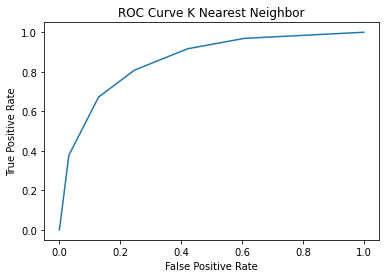

In [ ]:
from sklearn import metrics
#define metrics
y_pred_proba2 = model2.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba2)

#create ROC curve
plt.plot(fpr2,tpr2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve K Nearest Neighbor')
plt.show()

## Modeling Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=42)
model3.fit(X_train,y_train)

y_pred = model3.predict(X_test)
eval_classification(model3, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.81
Recall (Test Set): 0.82
F1-Score (Test Set): 0.81
AUC: 0.84


In [ ]:
print('Train score: ' + str(model3.score(X_train, y_train))) #accuracy
print('Test score:' + str(model3.score(X_test, y_test))) #accuracy

Train score: 0.9974137931034482
Test score:0.8436692506459949


OVERFIT

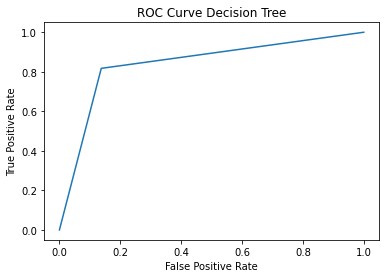

In [ ]:
#define metrics
y_pred_proba3 = model3.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba3)

#create ROC curve
plt.plot(fpr3,tpr3)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Decision Tree')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)]
min_samples_split = [2, 5, 10, 100] 
min_samples_leaf = [1, 2, 4, 10, 20, 50] 
max_features = ['auto', 'sqrt'] 

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model3 = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model3.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model3.predict(X_test)#Check performa dari model
eval_classification(model3, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.78
Recall (Test Set): 0.78
F1-Score (Test Set): 0.78
AUC: 0.81


In [ ]:
print('Train score: ' + str(model3.score(X_train, y_train)))
print('Test score:' + str(model3.score(X_test, y_test)))

Train score: 0.8665931642778391
Test score:0.7770897832817337


OVERFIT

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.89
Recall (Test Set): 0.84
F1-Score (Test Set): 0.86
AUC: 0.88


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
    n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
    max_features = ['auto', 'sqrt', 'log2'],
        )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = rf_tuned.predict(X_test)
eval_classification(rf_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.89
Recall (Test Set): 0.84
F1-Score (Test Set): 0.86
AUC: 0.88


In [ ]:
#membuat function untuk memanggil evaluasi model
def eval_classification_train(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytrain, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytrain, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytrain, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytrain, pred))
    
    fpr, tpr, thresholds = roc_curve(ytrain, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

In [ ]:
print('Train score: ' + str(rf_tuned.score(X_train, y_train)))
print('Test score:' + str(rf_tuned.score(X_test, y_test)))

Train score: 0.9966923925027563
Test score:0.8328173374613003


OVERFIT

## XGBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

[17:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.89
Precision (Test Set): 0.88
Recall (Test Set): 0.85
F1-Score (Test Set): 0.87
AUC: 0.88


In [ ]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = xg_tuned.predict(X_test)#Check performa dari model
eval_classification(xg_tuned, y_pred, X_train, y_train, X_test, y_test)

[17:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [ ]:
print('Train score: ' + str(xg_tuned.score(X_train, y_train)))
print('Test score:' + str(xg_tuned.score(X_test, y_test)))

Train score: 0.9977949283351709
Test score:0.8421052631578947


Berdasarkan model yang telah dilakukan di atas, model dengan hasil yang paling baik berdasarkan evaluasi modeling nya adalah RandomForest. Namun hampir pada semua jenis modeling yang dilakukan, hasilnya masih overfitting (test score lebih rendah daripada train score). Sehingga sepertinya perlu dilakukan iterasi modeling setelah melakukan feature selection setelah memperhatikan feature importance

# Feature Importance

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

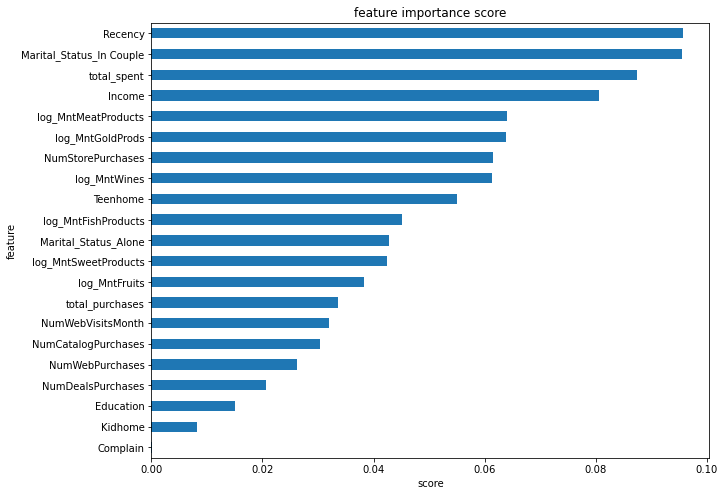

In [ ]:
#menampilkan feature importance score berdasarkan model Random Forest
show_feature_importance(rf_tuned.best_estimator_)

Dari barplot di atas menunjukkan bahwa 4 feature yang paling mempengaruhi model adalah `Recency`, `Marital_Status_In Couple`, `total_spent`, dan `Income`.